In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import sys
import os
import tsfresh as tsf
from tsfresh.utilities.dataframe_functions import impute



In [2]:
os.chdir('/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/station_level_prediction/xgboost_forecast/data/demand_data')
raw_ds = pd.read_csv("Xgboost_raw_dataset.csv")

raw_ds

,60_min_outf_130,60_min_outf_184,60_min_outf_293,60_min_outf_350,60_min_clstr_outflow,10_min_outf_130,10_min_outf_184,10_min_outf_293,10_min_outf_350,60_min_inf_130,60_min_inf_184,60_min_inf_293,60_min_inf_350,60_min_clstr_inflow,10_min_inf_130,10_min_inf_184,10_min_inf_293,10_min_inf_350
0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13071,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
13072,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,2,0,2
13073,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,2,0,0
13074,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0


end_10 13074
2179


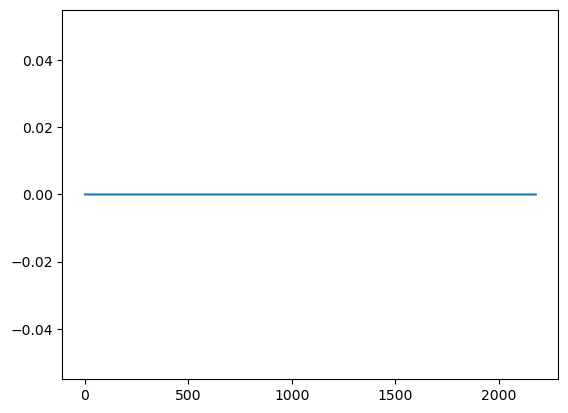

(array([], dtype=int64),)
(array([], dtype=int64),)


In [3]:
"""
TALLY the outflow
"""

# outflow
end_60 = np.where(raw_ds["60_min_clstr_outflow"].isnull() == True)[0][0] ## remove NAN values
end_10 = len(raw_ds) #np.where(raw_ds["10_min_outf_130"].isnull() == True)[0][0]

end = np.minimum(6*end_60,end_10)
end_60 = int(np.floor(end/6))
end_10 = end_60*6
print("end_10",end_10)
end_10_outf = end_10 

chosen_clstr_outf = raw_ds.loc[:end_60-1]["60_min_clstr_outflow"]
chosen_clstr_outf
tot_idx_10_min_outflow = end_10
tot_idx_10_min_outflow

ten_min_stn_outf = raw_ds.loc[:tot_idx_10_min_outflow-1][["10_min_outf_130","10_min_outf_184","10_min_outf_293","10_min_outf_350" ]]
tot_idx_10_min_outflow


ten_min_stn_outf # all staions demand df
agg_stns_outf = [] # aggregated staitons

for i in range(0,tot_idx_10_min_outflow-4,6): # max = 13038
    tot = sum(ten_min_stn_outf.loc[i:i+5].sum())
    agg_stns_outf.append(tot)

min_len = np.minimum(len(agg_stns_outf),len(chosen_clstr_outf))
print(min_len)

agg_stats = np.array(agg_stns_outf[:min_len])
chosen_clstr_outf = np.array(chosen_clstr_outf[:min_len])

plt.plot(agg_stats-chosen_clstr_outf)
plt.show()
print(np.where(agg_stats-chosen_clstr_outf<0))
print(np.where(agg_stats-chosen_clstr_outf>0))

end_10 13074
2179


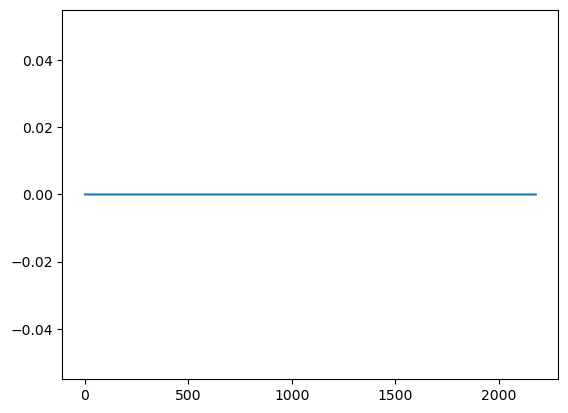

(array([], dtype=int64),)
(array([], dtype=int64),)


In [4]:
"""
TALLY the inflow
"""

# inflow
end_60 = np.where(raw_ds["60_min_clstr_inflow"].isnull() == True)[0][0] ## remove NAN values
end_10 = len(raw_ds) #np.where(raw_ds["10_min_inf_130"].isnull() == True)[0][0] 

end = np.minimum(6*end_60,end_10)
end_60 = int(np.floor(end/6))
end_10 = end_60*6
print("end_10",end_10)
end_10_inf = end_10

chosen_clstr_inf = raw_ds.loc[:end_60-1]["60_min_clstr_inflow"]
chosen_clstr_inf
tot_idx_10_min_inflow = end_10
tot_idx_10_min_inflow

ten_min_stn_inf = raw_ds.loc[:tot_idx_10_min_inflow-1][["10_min_inf_130","10_min_inf_184","10_min_inf_293","10_min_inf_350" ]]
tot_idx_10_min_inflow


ten_min_stn_inf # all staions demand df
agg_stns_inf = [] # aggregated staitons

for i in range(0,tot_idx_10_min_inflow-4,6): # max = 13038
    tot = sum(ten_min_stn_inf.loc[i:i+5].sum())
    agg_stns_inf.append(tot)

min_len = np.minimum(len(agg_stns_inf),len(chosen_clstr_inf))
print(min_len)

agg_stats = np.array(agg_stns_inf[:min_len])
chosen_clstr_inf = np.array(chosen_clstr_inf[:min_len])

plt.plot(agg_stats-chosen_clstr_inf)
plt.show()
print(np.where(agg_stats-chosen_clstr_inf<0))
print(np.where(agg_stats-chosen_clstr_inf>0))

In [5]:
"""""""""
Feature Generation
"""""""""

xgboost_features_df = pd.DataFrame(columns=["dt_ts","stn_id","rem_blk_outf","net_inflow_stn","en_route_inf","net_inflow_clstr","DeepAR_agg_outflow",
                                                                   "p_1wk_o","p_2wk_o","p_3wk_o", "block_id","ts_of_day", "hr_of_day", "day_of_wk",
                                                                     "day_of_mn", "wk_of_mon"])


"""

Feature description


# dt_ts : date time and time slot. date is y:m:d time is hour. ts is time slot 0-5 for 6 10-min time slots.
# stn_id : is station number 
# rem_blk_outf : remaining allowed demand. DeepAR_agg_outflow minus the sum of the blocks outflow to one block before present block in the current hour.
# net_inflow_stn : sum of last one days (144 time slots) to current time slot inflow/supply minus the sum of 
#                  last one day to current time slot outflow/demand in current station 
# DeepAR_agg_outflow : Hourly deepar prediction.
# p_1wk_o : previous 1_wk to time slot. seasonal demand 1 week prior to current time slot
# p_2wk_o : previous 2_wk to time slot.
# p_3wk_o : previous 3_wk to time slot.
# block_id : block number, 0 - (num_stations*6 -1). each hour has same block indices/id. combines station and time together as a crossed feature
# en_route_inf : en_route inflow is current supply value at that block
# net_inflow_clstr : how much inflow at cluster level, sum of last one day (24 hours) to current hour inflow/supply minus the sum of 
# last two days to current hour outflow/demand in current cluster, also called 'net_inflow_clstr_10_min' 
# ts_of_day : time slot of day (0-5) 6*10 mins = 1 hour
# hr_of_day : hour of day
# day_of_wk : day of week
# day_of_mn : day of month
# wk_of_mon : week of month
# p_1ts_o : outflow from previous 1 time slot's 
# p_2ts_o : outflow from previous 2 time slot's
# p_3ts_o : outflow from previous 3 time slot's

'dt_ts','stn_id','rem_blk_outf','net_inflow_stn','en_route_inf','net_inflow_clstr_10_min','DeepAR_agg_outflow','p_1wk_o','p_2wk_o','p_3wk_o','block_id','ts_of_day','hr_of_day','day_of_wk','day_of_mn','wk_of_mon','p_1ts_o','p_2ts_o','p_3ts_o'
"""


"""
TARGET Description

# target: 10 min station-level outflow

"""

"""
HYPERPARAMETERS in this code

win_lengths : aggregation window of tsfresh sub-time series features. 

"""


# create the dataframe of features for each station first and then concatenate them below each other.
# Finally use pivot table to create 3d table.

'\nHYPERPARAMETERS in this code\n\nwin_lengths : aggregation window of tsfresh sub-time series features. \n\n'

In [6]:
"""
Identify the stations,stn and generate dt_ts
"""

############ Identify stations ############
all_stations = raw_ds.columns
all_stations

ten_min_stns_outf_list = [s for s in all_stations if s[:11] == "10_min_outf"]
ten_min_stns_outf_list

ten_min_stns_inf_list = [s for s in all_stations if s[:10] == "10_min_inf"]
ten_min_stns_inf_list

stn_list = [ s[12:] for s in ten_min_stns_outf_list]
stn_list
############ Identify stations ############



############ generate dt_ts ############
# ensure that both inflow and outflow start and end at the same time
if (end_10_inf == end_10_outf):
    print("10 min inflow and 10 min outflow of same length")
    end_len_10 = end_10_inf # end length
    end_len_60 = int(end_len_10/6)
else:
    print("10 min inflow and 10 min outflow of DIFFERENT length")
    sys.exit()

# specify start date and time:
date = "2021-09-24"
hr = "00" 
min = "00" # 00, 10, 20, 30, 40, 50 represents the timeslots 0,1,2,3,4,5
ts = "0"
string_dt_hr = date + "-" + hr + "-" + min

dt_hr = dt.datetime.strptime(string_dt_hr,"%Y-%m-%d-%H-%M")

dt_dt_ts = []
dt_dt_ts.append(dt_hr)

# create list of datetimes
for _ in range(end_len_10-1):
    dt_hr = dt_hr + dt.timedelta(minutes=10 )
    dt_dt_ts.append(dt_hr)
dt_dt_ts

# convert to string
dt_ts_list = [] 
for i in range(len(dt_dt_ts)):
    dt_ts_list.append( dt.datetime.strftime(dt_dt_ts[i],"%Y/%m/%d %H:%M") )
#dt_ts_list

############ generate dt_ts ############


10 min inflow and 10 min outflow of same length


In [7]:
def create_DeepAR_agg_outflow(dt_ts_list,stn_list):

    col_list = [ "DeepAR_agg_outflow_"+s for s in stn_list] 
    DeepAR_agg_outflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    print(len(raw_ds.loc[:end_len_60-1]["60_min_clstr_outflow"].to_numpy()))

    for s in stn_list:
        DeepAR_agg_outflow_df["DeepAR_agg_outflow_"+s] = np.repeat(  raw_ds.loc[:end_len_60-1]["60_min_clstr_outflow"].to_numpy() ,repeats=6)

    print(len(dt_ts_list))

    return DeepAR_agg_outflow_df

df5 = create_DeepAR_agg_outflow(dt_ts_list,stn_list)
df5

2179
13074


,DeepAR_agg_outflow_130,DeepAR_agg_outflow_184,DeepAR_agg_outflow_293,DeepAR_agg_outflow_350
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
13069,1.0,1.0,1.0,1.0
13070,1.0,1.0,1.0,1.0
13071,1.0,1.0,1.0,1.0
13072,1.0,1.0,1.0,1.0


In [8]:
def create_rem_blk_outf(dt_ts_list,stn_list):
    
    col_list = [ "rem_blk_outf_"+s for s in stn_list] 
    rem_blk_outf_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        if (dt[-2:] == "00"):
            sum = 0
        for s in stn_list:
            rem_blk_outf_df.loc[i]["rem_blk_outf_"+s] =  df5.loc[i]["DeepAR_agg_outflow_"+s] - sum 
            sum = sum + raw_ds.loc[i]["10_min_outf_"+s]

        i+=1

    return rem_blk_outf_df

df1 = create_rem_blk_outf(dt_ts_list,stn_list)
df1

,rem_blk_outf_130,rem_blk_outf_184,rem_blk_outf_293,rem_blk_outf_350
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
13069,1.0,1.0,1.0,1.0
13070,1.0,1.0,1.0,0.0
13071,0.0,0.0,0.0,0.0
13072,0.0,0.0,0.0,0.0


In [9]:
def create_net_inflow_stn(dt_ts_list,stn_list):

    col_list = [ "net_inflow_stn_"+s for s in stn_list] 
    net_inflow_stn_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    past_days = 0.2 # decimal
    ten_min_slots = int(past_days*24*6)
    for s in stn_list:
        i=ten_min_slots
        for dt in dt_ts_list[ten_min_slots:]:
            net_inflow_stn_df.loc[i]["net_inflow_stn_"+s] = sum(raw_ds.loc[i-ten_min_slots:i-1]["10_min_inf_"+s]) - sum(raw_ds.loc[i-ten_min_slots:i-1]["10_min_outf_"+s])
            i+=1

    return net_inflow_stn_df

df2 = create_net_inflow_stn(dt_ts_list,stn_list)
df2

,net_inflow_stn_130,net_inflow_stn_184,net_inflow_stn_293,net_inflow_stn_350
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
13069,0,-1,-1,1
13070,0,-1,0,1
13071,0,-2,-1,2
13072,0,-3,-1,2


In [10]:
print("minimum net_inflow_stn_xx in df = ",np.min(df2.min().values))
print("maximum net_inflow_stn_xx in df = ",np.max(df2.max().values))

minimum net_inflow_stn_xx in df =  -5
maximum net_inflow_stn_xx in df =  5


In [11]:
def create_en_route_inf(dt_ts_list,stn_list):

    col_list = [ "en_route_inf_"+s for s in stn_list] 
    en_route_inf_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        for s in stn_list:
            en_route_inf_df.loc[i]["en_route_inf_"+s] = raw_ds.loc[i]["10_min_inf_"+s]
        
        i+=1

    return en_route_inf_df

df3 = create_en_route_inf(dt_ts_list,stn_list)
df3

,en_route_inf_130,en_route_inf_184,en_route_inf_293,en_route_inf_350
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
13069,0.0,0.0,1.0,0.0
13070,0.0,0.0,0.0,1.0
13071,0.0,0.0,0.0,0.0
13072,0.0,2.0,0.0,2.0


In [12]:
def create_net_inflow_clstr(dt_ts_list,stn_list):

    col_list = [ "net_inflow_clstr_"+s for s in stn_list] 
    net_inflow_clstr_60 = pd.DataFrame(index= range(end_len_60), columns=col_list)
    col_list = [ "net_inflow_clstr_10_min_"+s for s in stn_list] 
    net_inflow_clstr_10 = pd.DataFrame(index= range(end_len_10), columns=col_list)

    past_hours = 24
    i=past_hours
    for hr in range(past_hours,end_len_60,1):
        tot_sum = sum(raw_ds.loc[i-past_hours:i-1]["60_min_clstr_inflow"]) - sum(raw_ds.loc[i-past_hours:i-1]["60_min_clstr_outflow"]) 
        for s in stn_list:
            net_inflow_clstr_60.loc[i]["net_inflow_clstr_"+s] = tot_sum
        i+=1

    print(len(net_inflow_clstr_60["net_inflow_clstr_130"].to_numpy()))

    for s in stn_list:
        net_inflow_clstr_10["net_inflow_clstr_10_min_"+s] = np.repeat(  net_inflow_clstr_60["net_inflow_clstr_"+s].to_numpy() ,repeats=6)

    print(len(dt_ts_list))

    return net_inflow_clstr_10

df4 = create_net_inflow_clstr(dt_ts_list,stn_list)
df4


2179
13074


,net_inflow_clstr_10_min_130,net_inflow_clstr_10_min_184,net_inflow_clstr_10_min_293,net_inflow_clstr_10_min_350
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
13069,1.0,1.0,1.0,1.0
13070,1.0,1.0,1.0,1.0
13071,1.0,1.0,1.0,1.0
13072,1.0,1.0,1.0,1.0


In [13]:
print("minimum net_inflow_clstr in df = ",np.min(df4.min().values[1:]))
print("maximum net_inflow_clstr in df = ",np.max(df4.max().values[1:]))

minimum net_inflow_clstr in df =  -11.0
maximum net_inflow_clstr in df =  11.0


In [14]:
def create_prev_weeks_outflow(dt_ts_list,stn_list):
    
    col_list = [ "p_1wk_o_"+s for s in stn_list] + [ "p_2wk_o_"+s for s in stn_list] + [ "p_3wk_o_"+s for s in stn_list]
    prev_weeks_outflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    weekly_lags = [1,2,3] # lags in weeks

    for wk in weekly_lags:
        for s in stn_list:
            prev_weeks_outflow_df["p_"+str(wk)+"wk_o_"+s] = raw_ds["10_min_outf_"+s].shift(wk*7*24*6)

    return prev_weeks_outflow_df

df6 = create_prev_weeks_outflow(dt_ts_list,stn_list)
df6

,p_1wk_o_130,p_1wk_o_184,p_1wk_o_293,p_1wk_o_350,p_2wk_o_130,p_2wk_o_184,p_2wk_o_293,p_2wk_o_350,p_3wk_o_130,p_3wk_o_184,p_3wk_o_293,p_3wk_o_350
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13070,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
13071,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13072,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def create_prev_ts_outflow(dt_ts_list,stn_list):

    col_list = [ "p_1ts_o_"+s for s in stn_list] + [ "p_2ts_o_"+s for s in stn_list] + [ "p_3ts_o_"+s for s in stn_list]
    prev_ts_outflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    ts_lags = [1,2,3] # lags in 10-min time slots (ts)

    for ts in ts_lags:
        for s in stn_list:
            prev_ts_outflow_df["p_"+str(ts)+"ts_o_"+s] = raw_ds["10_min_outf_"+s].shift(ts)

    return prev_ts_outflow_df

df13 = create_prev_ts_outflow(dt_ts_list,stn_list)
df13

,p_1ts_o_130,p_1ts_o_184,p_1ts_o_293,p_1ts_o_350,p_2ts_o_130,p_2ts_o_184,p_2ts_o_293,p_2ts_o_350,p_3ts_o_130,p_3ts_o_184,p_3ts_o_293,p_3ts_o_350
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13071,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13072,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def create_block_id(dt_ts_list,stn_list):
    
    col_list = [ "block_id_"+s for s in stn_list] 
    block_id_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        if (dt[-2:] == "00"):
            id = 0
        for s in stn_list:
            block_id_df.loc[i]["block_id_"+s] = id
            id = id + 1
        
        i+=1

    return block_id_df

df7 = create_block_id(dt_ts_list,stn_list)
df7

,block_id_130,block_id_184,block_id_293,block_id_350
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
...,...,...,...,...
13069,4,5,6,7
13070,8,9,10,11
13071,12,13,14,15
13072,16,17,18,19


In [17]:
def create_ts_of_day(dt_ts_list,stn_list):

    col_list = [ "ts_of_day_"+s for s in stn_list] 
    ts_of_day_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    i=0
    for dt in dt_ts_list:
        for s in stn_list:
            ts_of_day_df.loc[i]["ts_of_day_"+s] = int(int(dt[-2:])/10)

        i+=1

    return ts_of_day_df

df8 = create_ts_of_day(dt_ts_list,stn_list)
df8

,ts_of_day_130,ts_of_day_184,ts_of_day_293,ts_of_day_350
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
...,...,...,...,...
13069,1,1,1,1
13070,2,2,2,2
13071,3,3,3,3
13072,4,4,4,4


In [18]:
def create_hr_of_day(dt_ts_list,stn_list):

    col_list = [ "hr_of_day_"+s for s in stn_list] 
    hr_of_day_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    for s in stn_list:
        hr_of_day_df["hr_of_day_"+s] = pd.to_datetime(dt_ts_list).hour

    return hr_of_day_df

df9 = create_hr_of_day(dt_ts_list,stn_list)
df9

,hr_of_day_130,hr_of_day_184,hr_of_day_293,hr_of_day_350
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
13069,18,18,18,18
13070,18,18,18,18
13071,18,18,18,18
13072,18,18,18,18


In [19]:
def create_day_of_wk(dt_ts_list,stn_list):

    col_list = [ "day_of_wk_"+s for s in stn_list] 
    day_of_wk_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    DayOfWeek = pd.to_datetime(dt_ts_list).day_of_week

    for s in stn_list:
        day_of_wk_df["day_of_wk_"+s] = DayOfWeek
        day_of_wk_df["is_weekend_"+s] = day_of_wk_df["day_of_wk_"+s].apply(lambda x: 1 if x > 4 else 0)

    return day_of_wk_df

df10 = create_day_of_wk(dt_ts_list,stn_list)
df10


,day_of_wk_130,day_of_wk_184,day_of_wk_293,day_of_wk_350,is_weekend_130,is_weekend_184,is_weekend_293,is_weekend_350
0,4,4,4,4,0,0,0,0
1,4,4,4,4,0,0,0,0
2,4,4,4,4,0,0,0,0
3,4,4,4,4,0,0,0,0
4,4,4,4,4,0,0,0,0
...,...,...,...,...,...,...,...,...
13069,3,3,3,3,0,0,0,0
13070,3,3,3,3,0,0,0,0
13071,3,3,3,3,0,0,0,0
13072,3,3,3,3,0,0,0,0


In [20]:
def create_day_of_mn(dt_ts_list,stn_list):

    col_list = [ "day_of_mn_"+s for s in stn_list] 
    day_of_mn_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    for s in stn_list:
        day_of_mn_df["day_of_mn_"+s] = pd.to_datetime(dt_ts_list).day

    return day_of_mn_df

df11 = create_day_of_mn(dt_ts_list,stn_list)
df11

,day_of_mn_130,day_of_mn_184,day_of_mn_293,day_of_mn_350
0,24,24,24,24
1,24,24,24,24
2,24,24,24,24
3,24,24,24,24
4,24,24,24,24
...,...,...,...,...
13069,23,23,23,23
13070,23,23,23,23
13071,23,23,23,23
13072,23,23,23,23


In [21]:
def create_wk_of_mon(dt_ts_list,stn_list):

    col_list = [ "wk_of_mon_"+s for s in stn_list] 
    wk_of_mon_df = pd.DataFrame(index= range(end_len_10), columns=col_list)
    wk_of_mon_df["dt_ts"] = dt_ts_list
    
    for s in stn_list:
        wk_of_mon_df["wk_of_mon_"+s] = wk_of_mon_df["dt_ts"].apply(lambda d: (int(d[8:10])-1) // 7 + 1) 

    wk_of_mon_df.drop(columns=["dt_ts"],inplace=True)
    return wk_of_mon_df

df12 = create_wk_of_mon(dt_ts_list,stn_list)
df12

,wk_of_mon_130,wk_of_mon_184,wk_of_mon_293,wk_of_mon_350
0,4,4,4,4
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
...,...,...,...,...
13069,4,4,4,4
13070,4,4,4,4
13071,4,4,4,4
13072,4,4,4,4


In [22]:
def create_future_inflow_ts(stn_list):

    col_list = [ "next_1ts_inf_"+s for s in stn_list]# + [ "next_2ts_inf_"+s for s in stn_list] + [ "next_3ts_inf_"+s for s in stn_list]
    next_ts_inflow_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    ts_leads = [1,2,3]#[1,2,3] # leads in 10-min time slots (ts)

    for ts in ts_leads:
        for s in stn_list:
            next_ts_inflow_df["next_"+str(ts)+"ts_inf_"+s] = raw_ds["10_min_inf_"+s].shift(-1*ts)

    shave_last_nrows = ts_leads[-1] # remove nan values at the end of df

    return next_ts_inflow_df, shave_last_nrows



df14,shave_last_nrows = create_future_inflow_ts(stn_list)
df14

,next_1ts_inf_130,next_1ts_inf_184,next_1ts_inf_293,next_1ts_inf_350,next_2ts_inf_130,next_2ts_inf_184,next_2ts_inf_293,next_2ts_inf_350,next_3ts_inf_130,next_3ts_inf_184,next_3ts_inf_293,next_3ts_inf_350
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
13070,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
13071,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
13072,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
def create_station_lat_long_(stn_list):
    #TODO: when data becomes bigger need to create this



    return


# df17 = create_station_lat_long_(stn_list)
# df17

In [24]:
def create_difference_ts(stn_list):

    col_list = [ "outf_10m_dif1_per1_"+s for s in stn_list] + [ "outf_10m_dif1_per2_"+s for s in stn_list] + [ "outf_10m_dif2_per1_"+s for s in stn_list] \
                + [ "inf_10m_dif1_per1_"+s for s in stn_list] + [ "inf_10m_dif1_per2_"+s for s in stn_list] + [ "inf_10m_dif2_per1_"+s for s in stn_list]
    diff_ts_df = pd.DataFrame(index= range(end_len_10), columns=col_list)

    diff1 = [1,2] # periods of 1st differencing

    for p in diff1:
        for s in stn_list:
            diff_ts_df["outf_10m_dif1_per"+str(p)+"_"+s] = raw_ds["10_min_outf_"+s].diff(periods=p)
            diff_ts_df["inf_10m_dif1_per"+str(p)+"_"+s] = raw_ds["10_min_inf_"+s].diff(periods=p)

    diff2 = [1] # periods of 2nd differencing

    for p in diff2:
        for s in stn_list:
            diff_ts_df["outf_10m_dif2_per"+str(p)+"_"+s] = raw_ds["10_min_outf_"+s].diff(periods=p).diff()
            diff_ts_df["inf_10m_dif2_per"+str(p)+"_"+s] = raw_ds["10_min_inf_"+s].diff(periods=p).diff()

    return diff_ts_df


df15 = create_difference_ts(stn_list)
df15

,outf_10m_dif1_per1_130,outf_10m_dif1_per1_184,outf_10m_dif1_per1_293,outf_10m_dif1_per1_350,outf_10m_dif1_per2_130,outf_10m_dif1_per2_184,outf_10m_dif1_per2_293,outf_10m_dif1_per2_350,outf_10m_dif2_per1_130,outf_10m_dif2_per1_184,...,inf_10m_dif1_per1_293,inf_10m_dif1_per1_350,inf_10m_dif1_per2_130,inf_10m_dif1_per2_184,inf_10m_dif1_per2_293,inf_10m_dif1_per2_350,inf_10m_dif2_per1_130,inf_10m_dif2_per1_184,inf_10m_dif2_per1_293,inf_10m_dif2_per1_350
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13070,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.0,1.0
13071,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,-2.0
13072,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,3.0


In [25]:
""""
add Target
"""

df_list = [df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]
# df_list1 = []
# df_list1.append(df1)

# for d in df_list[1:]:
#     df_list1.append(d)

target_df = pd.DataFrame()
col_list = ten_min_stn_outf.columns
for s,c in zip(stn_list,col_list):
    target_df["target_"+s] = ten_min_stn_outf[c]

df_list.append(target_df)

full_ds = pd.concat(df_list,axis=1)
full_ds.insert(0,'dt_ts',pd.to_datetime(dt_ts_list))

full_ds # full dataset


,dt_ts,rem_blk_outf_130,rem_blk_outf_184,rem_blk_outf_293,rem_blk_outf_350,net_inflow_stn_130,net_inflow_stn_184,net_inflow_stn_293,net_inflow_stn_350,en_route_inf_130,...,inf_10m_dif1_per2_293,inf_10m_dif1_per2_350,inf_10m_dif2_per1_130,inf_10m_dif2_per1_184,inf_10m_dif2_per1_293,inf_10m_dif2_per1_350,target_130,target_184,target_293,target_350
0,2021-09-24 00:00:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,2021-09-24 00:10:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2021-09-24 00:20:00,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,2021-09-24 00:30:00,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,2021-09-24 00:40:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,2021-12-23 18:10:00,1.0,1.0,1.0,1.0,0,-1,-1,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0
13070,2021-12-23 18:20:00,1.0,1.0,1.0,0.0,0,-1,0,1,0.0,...,0.0,1.0,0.0,0.0,-2.0,1.0,0,0,1,0
13071,2021-12-23 18:30:00,0.0,0.0,0.0,0.0,0,-2,-1,2,0.0,...,-1.0,0.0,0.0,0.0,1.0,-2.0,0,0,0,0
13072,2021-12-23 18:40:00,0.0,0.0,0.0,0.0,0,-3,-1,2,0.0,...,0.0,1.0,0.0,2.0,0.0,3.0,0,0,0,0


In [26]:
"""
Remove NaN elements in xgboost_feat_train_ds
"""

full_ds = full_ds.dropna().reset_index(drop=True)
full_ds

,dt_ts,rem_blk_outf_130,rem_blk_outf_184,rem_blk_outf_293,rem_blk_outf_350,net_inflow_stn_130,net_inflow_stn_184,net_inflow_stn_293,net_inflow_stn_350,en_route_inf_130,...,inf_10m_dif1_per2_293,inf_10m_dif1_per2_350,inf_10m_dif2_per1_130,inf_10m_dif2_per1_184,inf_10m_dif2_per1_293,inf_10m_dif2_per1_350,target_130,target_184,target_293,target_350
0,2021-10-15 00:00:00,1.0,1.0,1.0,1.0,0,0,1,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0
1,2021-10-15 00:10:00,1.0,1.0,1.0,1.0,0,1,1,2,0.0,...,0.0,0.0,0.0,-2.0,0.0,0.0,0,0,0,1
2,2021-10-15 00:20:00,0.0,0.0,0.0,0.0,0,0,1,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0
3,2021-10-15 00:30:00,0.0,0.0,0.0,0.0,0,0,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,2021-10-15 00:40:00,0.0,0.0,0.0,0.0,0,0,1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,2021-12-23 18:00:00,1.0,1.0,1.0,1.0,0,-1,-1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
10045,2021-12-23 18:10:00,1.0,1.0,1.0,1.0,0,-1,-1,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0
10046,2021-12-23 18:20:00,1.0,1.0,1.0,0.0,0,-1,0,1,0.0,...,0.0,1.0,0.0,0.0,-2.0,1.0,0,0,1,0
10047,2021-12-23 18:30:00,0.0,0.0,0.0,0.0,0,-2,-1,2,0.0,...,-1.0,0.0,0.0,0.0,1.0,-2.0,0,0,0,0


In [27]:
"""
seperate the features dataset into list of stations.
"""

col_list = full_ds.columns

df_list = [0]*len(stn_list)

i=0
for s in stn_list:
    df_list[i] = pd.DataFrame(index=range(len(full_ds)))
    df_list[i] = pd.concat([df_list[i], full_ds[col_list[0]]],axis=1) # add dt_ts
    #print(df_list[i])
    for c in col_list:
        c_id = c.split("_")
        if c_id[-1] == s:
            df_list[i] = pd.concat([df_list[i], full_ds[c]],axis=1)
    i+=1


In [28]:

"""
put each station's time series below each other (stack) by adding station id 
"""

col_list = ['dt_ts','stn_id','rem_blk_outf','net_inflow_stn','en_route_inf','net_inflow_clstr_10_min','DeepAR_agg_outflow','p_1wk_o','p_2wk_o','p_3wk_o','block_id','ts_of_day','hr_of_day','day_of_wk','is_weekend','day_of_mn','wk_of_mon','p_1ts_o','p_2ts_o','p_3ts_o','next_1ts_inf','next_2ts_inf','next_3ts_inf','inf_10m_dif1_per1','inf_10m_dif1_per2','inf_10m_dif2_per1','outf_10m_dif1_per1','outf_10m_dif1_per2','outf_10m_dif2_per1','target']

all_stns_df = pd.DataFrame(columns=col_list)

for i,s in enumerate(stn_list):
    df_list[i].insert(1,'stn_id', np.tile( s, df_list[i].shape[0]) )
    df_list[i].columns = all_stns_df.columns
    all_stns_df = pd.concat([all_stns_df,df_list[i]],axis=0)
    #all_stns_df = all_stns_df.append(df_list[i],ignore_index=True)

all_stns_df

,dt_ts,stn_id,rem_blk_outf,net_inflow_stn,en_route_inf,net_inflow_clstr_10_min,DeepAR_agg_outflow,p_1wk_o,p_2wk_o,p_3wk_o,...,next_1ts_inf,next_2ts_inf,next_3ts_inf,inf_10m_dif1_per1,inf_10m_dif1_per2,inf_10m_dif2_per1,outf_10m_dif1_per1,outf_10m_dif1_per2,outf_10m_dif2_per1,target
0,2021-10-15 00:00:00,130,1.0,0,0.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2021-10-15 00:10:00,130,1.0,0,0.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2021-10-15 00:20:00,130,0.0,0,0.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2021-10-15 00:30:00,130,0.0,0,0.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2021-10-15 00:40:00,130,0.0,0,0.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,2021-12-23 18:00:00,350,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0
10045,2021-12-23 18:10:00,350,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10046,2021-12-23 18:20:00,350,0.0,1,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
10047,2021-12-23 18:30:00,350,0.0,2,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0


In [29]:
"""
convert from object type to float64

"""

all_stns_df.stn_id = pd.to_numeric(all_stns_df.stn_id)
all_stns_df.rem_blk_outf =  pd.to_numeric(all_stns_df.rem_blk_outf)
all_stns_df.net_inflow_stn =  pd.to_numeric(all_stns_df.net_inflow_stn)
all_stns_df.en_route_inf =  pd.to_numeric(all_stns_df.en_route_inf)
all_stns_df.net_inflow_clstr_10_min =  pd.to_numeric(all_stns_df.net_inflow_clstr_10_min)
all_stns_df.block_id =  pd.to_numeric(all_stns_df.block_id)
all_stns_df.ts_of_day =  pd.to_numeric(all_stns_df.ts_of_day)
all_stns_df.hr_of_day =  pd.to_numeric(all_stns_df.hr_of_day)
all_stns_df.day_of_wk =  pd.to_numeric(all_stns_df.day_of_wk)
all_stns_df.is_weekend =  pd.to_numeric(all_stns_df.is_weekend)

all_stns_df.day_of_mn =  pd.to_numeric(all_stns_df.day_of_mn)
all_stns_df.wk_of_mon =  pd.to_numeric(all_stns_df.wk_of_mon)
all_stns_df.target =  pd.to_numeric(all_stns_df.target)

print('all_stns_df.dtypes: ',all_stns_df.dtypes)
print('all_stns_df.shape: ', all_stns_df.shape)

all_stns_df.dtypes:  dt_ts                      datetime64[ns]
stn_id                              int64
rem_blk_outf                      float64
net_inflow_stn                      int64
en_route_inf                      float64
net_inflow_clstr_10_min           float64
DeepAR_agg_outflow                float64
p_1wk_o                           float64
p_2wk_o                           float64
p_3wk_o                           float64
block_id                            int64
ts_of_day                           int64
hr_of_day                           int64
day_of_wk                           int64
is_weekend                          int64
day_of_mn                           int64
wk_of_mon                           int64
p_1ts_o                           float64
p_2ts_o                           float64
p_3ts_o                           float64
next_1ts_inf                      float64
next_2ts_inf                      float64
next_3ts_inf                      float64
inf_10m_dif1_

In [30]:
"""
Add tsfresh features to original features and save as csv
"""


win_lengths = [6*24*7] # hyperparameter

# drop all categorical columns
numeric_columns = all_stns_df.drop(columns=[ 'block_id', 'ts_of_day', 'hr_of_day', 'day_of_wk', 'is_weekend','day_of_mn','wk_of_mon'])

col_list = numeric_columns.columns


feature_settings = {'fft_coefficient': [{'coeff': 0, 'attr': 'real'}, {'coeff': 1, 'attr': 'real'}],
                    'mean': None,
                    'standard_deviation': None,
                    'skewness': None,
                    'kurtosis': None,
                    'minimum': None,
                    'maximum': None,
                    'sum_values': None,
                    'variance': None,
                    'absolute_sum_of_changes': None,
                    'count_above_mean': None,
                    'count_below_mean': None,
                    'longest_strike_above_mean': None,
                    'longest_strike_below_mean': None,
                    'number_crossing_m': [{'m': 0}],
                    'autocorrelation': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
                    'partial_autocorrelation': [{'lag': 1}, {'lag': 2}, {'lag': 3}]}


for c in col_list[3:]: # select 1 numeric column at a time
    print('time series name: ',c)
    for win in win_lengths:
        num_df = numeric_columns.loc[:,['dt_ts','stn_id',c]]
        print('num_df.shape', num_df.shape)
        df_rolled = tsf.utilities.dataframe_functions.roll_time_series(num_df,column_id='stn_id',column_sort='dt_ts',max_timeshift=win)
        df_rolled.drop(columns=['stn_id'], inplace=True)
        df_features = tsf.extract_features(df_rolled, column_id='id', column_sort='dt_ts', 
                                            default_fc_parameters=feature_settings)
        del df_rolled # free-up the RAM

        # Remove any missing values
        imputed_features = impute(df_features)
        del df_features # free-up the RAM

        # Select a subset of relevant features using tsfresh's built-in feature selection function
        all_stns_df.index= range(all_stns_df.shape[0])
        imputed_features.index = range(all_stns_df.shape[0])
        selected_features = tsf.select_features(imputed_features, all_stns_df['target'])
        del imputed_features # free-up the RAM

        # Print the names of the selected features
        print('selected_features.columns',selected_features.columns)

        print('selected_features.columns: ',selected_features.columns)
        print('selected_features.shape: ',selected_features.shape)

        print('all_stns_df.columns: ',all_stns_df.columns)
        print('all_stns_df.shape: ',all_stns_df.shape)



        all_stns_df = pd.concat([all_stns_df,selected_features],axis=1)



        del num_df # free-up the RAM
        del selected_features # free-up the RAM


all_stns_df.shape
#all_stns_df.to_csv("xgboost_extra_feat_train_ds_all_stns.csv")
del numeric_columns


time series name:  net_inflow_stn
num_df.shape (40196, 3)


Feature Extraction: 100%|██████████| 60/60 [00:07<00:00,  7.61it/s]


selected_features.columns Index(['net_inflow_stn__variance', 'net_inflow_stn__standard_deviation',
       'net_inflow_stn__absolute_sum_of_changes',
       'net_inflow_stn__number_crossing_m__m_0', 'net_inflow_stn__kurtosis',
       'net_inflow_stn__minimum',
       'net_inflow_stn__partial_autocorrelation__lag_1',
       'net_inflow_stn__autocorrelation__lag_1', 'net_inflow_stn__maximum',
       'net_inflow_stn__autocorrelation__lag_2', 'net_inflow_stn__sum_values',
       'net_inflow_stn__fft_coefficient__attr_"real"__coeff_0',
       'net_inflow_stn__mean', 'net_inflow_stn__autocorrelation__lag_3',
       'net_inflow_stn__partial_autocorrelation__lag_3',
       'net_inflow_stn__longest_strike_above_mean', 'net_inflow_stn__skewness',
       'net_inflow_stn__fft_coefficient__attr_"real"__coeff_1',
       'net_inflow_stn__count_above_mean'],
      dtype='object')
selected_features.columns:  Index(['net_inflow_stn__variance', 'net_inflow_stn__standard_deviation',
       'net_inflow_stn_

Feature Extraction: 100%|██████████| 60/60 [00:07<00:00,  7.58it/s]


selected_features.columns Index(['en_route_inf__mean', 'en_route_inf__variance',
       'en_route_inf__standard_deviation', 'en_route_inf__sum_values',
       'en_route_inf__fft_coefficient__attr_"real"__coeff_0',
       'en_route_inf__count_above_mean', 'en_route_inf__skewness',
       'en_route_inf__absolute_sum_of_changes',
       'en_route_inf__number_crossing_m__m_0',
       'en_route_inf__longest_strike_above_mean', 'en_route_inf__kurtosis',
       'en_route_inf__autocorrelation__lag_2',
       'en_route_inf__partial_autocorrelation__lag_2',
       'en_route_inf__count_below_mean',
       'en_route_inf__autocorrelation__lag_1',
       'en_route_inf__partial_autocorrelation__lag_1', 'en_route_inf__maximum',
       'en_route_inf__longest_strike_below_mean',
       'en_route_inf__autocorrelation__lag_3',
       'en_route_inf__fft_coefficient__attr_"real"__coeff_1',
       'en_route_inf__partial_autocorrelation__lag_3'],
      dtype='object')
selected_features.columns:  Index(['en_ro

Feature Extraction: 100%|██████████| 60/60 [00:07<00:00,  7.79it/s]


selected_features.columns Index(['net_inflow_clstr_10_min__fft_coefficient__attr_"real"__coeff_1'], dtype='object')
selected_features.columns:  Index(['net_inflow_clstr_10_min__fft_coefficient__attr_"real"__coeff_1'], dtype='object')
selected_features.shape:  (40196, 1)
all_stns_df.columns:  Index(['dt_ts', 'stn_id', 'rem_blk_outf', 'net_inflow_stn', 'en_route_inf',
       'net_inflow_clstr_10_min', 'DeepAR_agg_outflow', 'p_1wk_o', 'p_2wk_o',
       'p_3wk_o', 'block_id', 'ts_of_day', 'hr_of_day', 'day_of_wk',
       'is_weekend', 'day_of_mn', 'wk_of_mon', 'p_1ts_o', 'p_2ts_o', 'p_3ts_o',
       'next_1ts_inf', 'next_2ts_inf', 'next_3ts_inf', 'inf_10m_dif1_per1',
       'inf_10m_dif1_per2', 'inf_10m_dif2_per1', 'outf_10m_dif1_per1',
       'outf_10m_dif1_per2', 'outf_10m_dif2_per1', 'target',
       'net_inflow_stn__variance', 'net_inflow_stn__standard_deviation',
       'net_inflow_stn__absolute_sum_of_changes',
       'net_inflow_stn__number_crossing_m__m_0', 'net_inflow_stn__kurtosi

Feature Extraction: 100%|██████████| 60/60 [00:07<00:00,  7.79it/s]


selected_features.columns Index(['DeepAR_agg_outflow__fft_coefficient__attr_"real"__coeff_1',
       'DeepAR_agg_outflow__count_above_mean', 'DeepAR_agg_outflow__mean',
       'DeepAR_agg_outflow__sum_values',
       'DeepAR_agg_outflow__fft_coefficient__attr_"real"__coeff_0',
       'DeepAR_agg_outflow__partial_autocorrelation__lag_1',
       'DeepAR_agg_outflow__autocorrelation__lag_1',
       'DeepAR_agg_outflow__count_below_mean',
       'DeepAR_agg_outflow__autocorrelation__lag_2',
       'DeepAR_agg_outflow__autocorrelation__lag_3'],
      dtype='object')
selected_features.columns:  Index(['DeepAR_agg_outflow__fft_coefficient__attr_"real"__coeff_1',
       'DeepAR_agg_outflow__count_above_mean', 'DeepAR_agg_outflow__mean',
       'DeepAR_agg_outflow__sum_values',
       'DeepAR_agg_outflow__fft_coefficient__attr_"real"__coeff_0',
       'DeepAR_agg_outflow__partial_autocorrelation__lag_1',
       'DeepAR_agg_outflow__autocorrelation__lag_1',
       'DeepAR_agg_outflow__count_belo

Feature Extraction: 100%|██████████| 60/60 [00:08<00:00,  6.86it/s]


selected_features.columns Index(['p_1wk_o__variance', 'p_1wk_o__standard_deviation', 'p_1wk_o__mean',
       'p_1wk_o__longest_strike_above_mean', 'p_1wk_o__maximum',
       'p_1wk_o__fft_coefficient__attr_"real"__coeff_0', 'p_1wk_o__sum_values',
       'p_1wk_o__skewness', 'p_1wk_o__count_above_mean', 'p_1wk_o__kurtosis',
       'p_1wk_o__absolute_sum_of_changes', 'p_1wk_o__number_crossing_m__m_0',
       'p_1wk_o__autocorrelation__lag_1',
       'p_1wk_o__partial_autocorrelation__lag_1',
       'p_1wk_o__autocorrelation__lag_3', 'p_1wk_o__autocorrelation__lag_2',
       'p_1wk_o__count_below_mean', 'p_1wk_o__partial_autocorrelation__lag_3',
       'p_1wk_o__partial_autocorrelation__lag_2',
       'p_1wk_o__longest_strike_below_mean',
       'p_1wk_o__fft_coefficient__attr_"real"__coeff_1'],
      dtype='object')
selected_features.columns:  Index(['p_1wk_o__variance', 'p_1wk_o__standard_deviation', 'p_1wk_o__mean',
       'p_1wk_o__longest_strike_above_mean', 'p_1wk_o__maximum',
     

Feature Extraction: 100%|██████████| 60/60 [00:07<00:00,  7.84it/s]


selected_features.columns Index(['p_2wk_o__mean', 'p_2wk_o__standard_deviation', 'p_2wk_o__variance',
       'p_2wk_o__longest_strike_above_mean', 'p_2wk_o__sum_values',
       'p_2wk_o__fft_coefficient__attr_"real"__coeff_0',
       'p_2wk_o__count_above_mean', 'p_2wk_o__skewness',
       'p_2wk_o__absolute_sum_of_changes', 'p_2wk_o__number_crossing_m__m_0',
       'p_2wk_o__kurtosis', 'p_2wk_o__maximum',
       'p_2wk_o__autocorrelation__lag_3', 'p_2wk_o__autocorrelation__lag_1',
       'p_2wk_o__partial_autocorrelation__lag_1',
       'p_2wk_o__autocorrelation__lag_2',
       'p_2wk_o__partial_autocorrelation__lag_3', 'p_2wk_o__count_below_mean',
       'p_2wk_o__partial_autocorrelation__lag_2',
       'p_2wk_o__longest_strike_below_mean',
       'p_2wk_o__fft_coefficient__attr_"real"__coeff_1'],
      dtype='object')
selected_features.columns:  Index(['p_2wk_o__mean', 'p_2wk_o__standard_deviation', 'p_2wk_o__variance',
       'p_2wk_o__longest_strike_above_mean', 'p_2wk_o__sum_valu

Feature Extraction:  27%|██▋       | 16/60 [00:02<00:08,  5.40it/s]


KeyboardInterrupt: 

In [ ]:
""" 
SAVE To csv file

"""

all_stns_df.to_csv("xgboost_feat_train_ds_all_stns.csv")
all_stns_df

net_inflow_stn__fft_coefficient__attr_"real"__coeff_0  \
130 2021-10-15 00:00:00                                                0.0       
    2021-10-15 00:10:00                                                0.0       
    2021-10-15 00:20:00                                                0.0       
    2021-10-15 00:30:00                                                0.0       
    2021-10-15 00:40:00                                                0.0       
...                                                                    ...       
350 2021-12-23 18:00:00                                               41.0       
    2021-12-23 18:10:00                                               41.0       
    2021-12-23 18:20:00                                               41.0       
    2021-12-23 18:30:00                                               43.0       
    2021-12-23 18:40:00                                               45.0       

                         net_inflow_stn__fft_coefficient__attr_"real"__coeff_1  \
130 2021-10-15 00:00:00                                           3.164635       
    2021-10-15 00:10:00                                           0.000000       
    2021-10-15 00:20:00                                           0.000000       
    2021-10-15 00:30:00                                           0.000000       
    2021-10-15 00:40:00                                           0.000000       
...                                                                    ...       
350 2021-12-23 18:00:00                                           3.389698       
    2021-12-23 18:10:00                                           3.176763       
    2021-12-23 18:20:00                                           2.963705       
    2021-12-23 18:30:00                                           4.750493       
    2021-12-23 18:40:00                                           6.537059       

                         net_inflow_stn__mean  \
130 2021-10-15 00:00:00              0.000000   
    2021-10-15 00:10:00              0.000000   
    2021-10-15 00:20:00              0.000000   
    2021-10-15 00:30:00              0.000000   
    2021-10-15 00:40:00              0.000000   
...                                       ...   
350 2021-12-23 18:00:00              0.040634   
    2021-12-23 18:10:00              0.040634   
    2021-12-23 18:20:00              0.040634   
    2021-12-23 18:30:00              0.042616   
    2021-12-23 18:40:00              0.044599   

                         net_inflow_stn__standard_deviation  \
130 2021-10-15 00:00:00                            0.000000   
    2021-10-15 00:10:00                            0.000000   
    2021-10-15 00:20:00                            0.000000   
    2021-10-15 00:30:00                            0.000000   
    2021-10-15 00:40:00                            0.000000   
...                                                     ...   
350 2021-12-23 18:00:00                            1.147814   
    2021-12-23 18:10:00                            1.147814   
    2021-12-23 18:20:00                            1.147814   
    2021-12-23 18:30:00                            1.149468   
    2021-12-23 18:40:00                            1.151116   

                         net_inflow_stn__skewness  net_inflow_stn__kurtosis  \
130 2021-10-15 00:00:00                  0.053534                  0.751975   
    2021-10-15 00:10:00                  0.053534                  0.751975   
    2021-10-15 00:20:00                  0.000000                  0.751975   
    2021-10-15 00:30:00                  0.000000                  0.000000   
    2021-10-15 00:40:00                  0.000000                  0.000000   
...                                           ...                       ...   
350 2021-12-23 18:00:00                  0.526978                  1.060213   
    2021-12-23 18:10:00                  0.526978                  1.060213  